## Analysis of road traffic

Data fetched from [Department for Transport](https://roadtraffic.dft.gov.uk/downloads)

Two datasets, Regional Traffic by vehicle type and local authority traffic are analysed.

In [9]:
# load libraries

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
# regional analysis

traffic_df = pd.read_csv('https://storage.googleapis.com/dft-statistics/road-traffic/downloads/data-gov-uk/region_traffic_by_vehicle_type.csv')

la_traffic_df = pd.read_csv('https://storage.googleapis.com/dft-statistics/road-traffic/downloads/data-gov-uk/local_authority_traffic.csv')

In [11]:
# extract London

london_ons = 'E12000007'
london_traffic = traffic_df[traffic_df['ons_code'] == london_ons]

In [12]:
# extract local authority

london_la_traffic = la_traffic_df[la_traffic_df['ONS_code'].str.contains('E09')]

In [13]:
# save traffic

# london_traffic.to_csv('data/london_traffic.csv')
# london_la_traffic.to_csv('data/london_traffic_boroughs.csv')

In [14]:
london_traffic

,year,region_id,Region_name,ons_code,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
5,1993,6,London,E12000007,14350.44600,8916.95,272098090.7,358169320.0,15882514166,273427487.5,1928558767,640880245.8,19083549986
16,1994,6,London,E12000007,14384.45600,8938.09,278441721.3,369382328.5,16062810857,281778335.3,2010906197,623654797.9,19348532516
27,1995,6,London,E12000007,14417.87400,8958.85,283280561.7,359949803.2,16003118930,303703868.8,2086967051,608719496.9,19362459150
38,1996,6,London,E12000007,14447.84700,8977.48,290084450.6,375012094.2,16161494717,309645905.8,2055510242,647225102.1,19548888061
49,1997,6,London,E12000007,14488.18100,9002.54,289069781.3,398621461.7,16229364980,314989192.0,2105300362,646069123.6,19694345119
60,1998,6,London,E12000007,14522.65300,9023.96,274374870.4,406485726.5,16283310614,317415517.5,2113837083,698619750.2,19819668691
71,1999,6,London,E12000007,14568.80000,9052.63,280888940.9,443326861.0,16643703170,329838479.5,2224175485,673954979.6,20314998976
82,2000,6,London,E12000007,14603.80000,9074.38,285064173.2,443197633.7,16579095382,320750641.3,2246917172,698395128.5,20288355958
93,2001,6,London,E12000007,14640.30000,9097.06,303232071.7,470668954.5,16581792774,318642518.0,2275163005,683621998.7,20329889250
104,2002,6,London,E12000007,14678.82000,9121.00,311966481.9,471420594.9,16689506246,331580609.1,2253473670,669524447.4,20415505567


In [15]:
london_la_traffic.groupby('year').all_motor_vehicles.sum()

year
1993    1.908355e+10
1994    1.934853e+10
1995    1.936246e+10
1996    1.954889e+10
1997    1.969435e+10
1998    1.981967e+10
1999    2.031500e+10
2000    2.028836e+10
2001    2.032989e+10
2002    2.041551e+10
2003    2.044811e+10
2004    2.036351e+10
2005    2.042266e+10
2006    2.068170e+10
2007    2.064137e+10
2008    2.023345e+10
2009    2.011163e+10
2010    1.985199e+10
2011    1.949526e+10
2012    1.934055e+10
2013    1.931446e+10
2014    1.968042e+10
2015    1.965018e+10
2016    2.008303e+10
2017    2.005536e+10
2018    1.999286e+10
2019    2.026437e+10
2020    1.661364e+10
2021    1.845329e+10
2022    1.908935e+10
Name: all_motor_vehicles, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


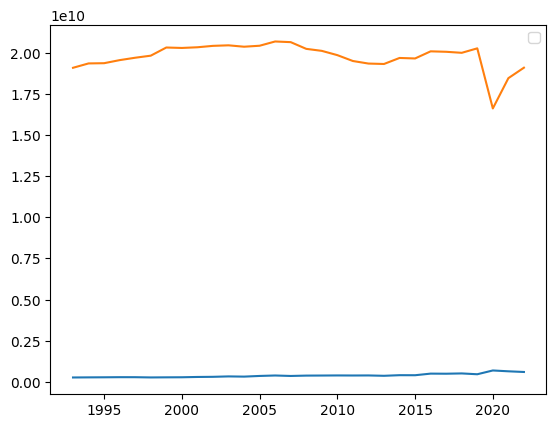

In [17]:
# create graph for annual change

plt.plot(
    london_traffic['year'],
    london_traffic['pedal_cycles'],
    legend = True
)

plt.plot(
    london_traffic['year'],
    london_traffic['all_motor_vehicles']
)

